In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Freefall(state,time):
    g0 = state[1]
    g1 = -9.8
    return np.array([g0,g1])

In [3]:
def euler(y,t,dt,derivs):
    y_next = y + derivs(y,t)*dt
    return y_next

In [19]:
#force on a spring is F = -mg -kx. We will plot the motion of a mass hanging on the end of a spring. 


N = 10000 #numbers of steps to take
x0 = 0.0 #initial conditions
v0 = 0.0

tau = 3.0 #total simulation time 

k = 3.5
m = 0.2
g = 9.8

time = np.linspace(0,tau,N)

y = np.zeros([N,2])

y[0,0] = x0
y[0,1] = v0

def SHO(state,time):
    """"This defines the differential equation:
    dx^2/dt^2 = -k/m x -g
    
    We break to two second-order DE into two first-
    order DEs by:
    dx/dt = v
    dv/dt = k/m x -g
    """
    
    g0 = state[1]
    g1 = (-k/m)*state[0] - g
    
    return np.array([g0,g1])

# Loop o n l y t o N−1 so t h a t we don ’ t run i n t o a
# problem a d d r e s s i n g y [N+1] on t h e l a s t p o i n t .

dt = tau/N
for j in range(N-1):
    y[j+1] = euler(y[j],time[j],dt,SHO)

In [20]:
xdata = [y[j,0] for j in range(N)]
vdata = [y[j,1] for j in range(N)]

Text(0, 0.5, 'position, velocity')

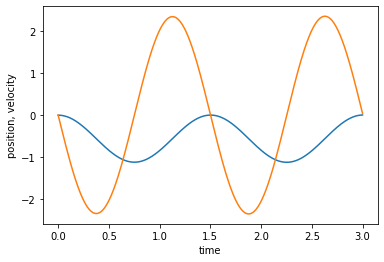

In [25]:
plt.plot(time,xdata)
plt.plot(time,vdata)
plt.xlabel("time")
plt.ylabel('position, velocity')

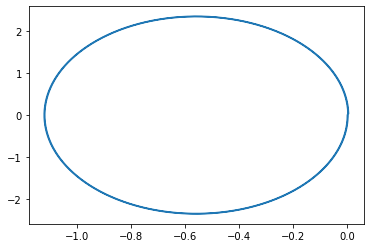

In [23]:
plt.plot(xdata,vdata)

In [27]:
def rk2(y,time,dt,derivs):
    
    k0 = dt*derivs(y,time)
    k1 = dt*derivs(y+k0,time+dt)
    
    y_next = y+ 0.5*(k0+k1)
    
    return y_next

In [28]:
from tools import rk4

Text(0, 0.5, 'position')

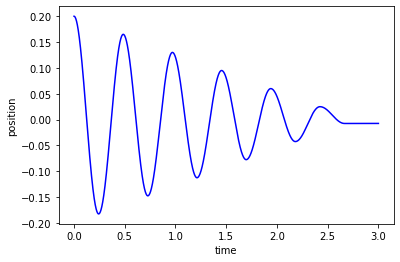

In [31]:
N = 5000
x0 = 0.2
v0 = 0.0

tau = 3.0

dt = tau/float(N-1)

k = 42.0
m = 0.25
g = 9.8
mu = 0.15

y = np.zeros([N,2])

y[0,0] = x0
y[0,1] = v0

def Spring(state,time):
    
    g0 = state[1]
    
    if g0 > 0 :
        g1 = -k/m * state[0] - g*mu
    else:
        g1 = -k/m * state[0] + g*mu
        
    return np.array([g0,g1])

for j in range(N-1):
    
    y[j+1] = rk4(y[j],0,dt,Spring)
    
time = np.linspace(0,tau,N)
plt.plot(time,y[:,0],'b-',label="position")
plt.xlabel("time")
plt.ylabel("position")

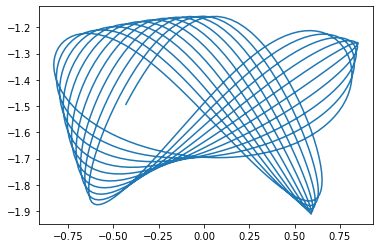

In [35]:
from scipy.integrate import odeint

N = 1000

y = np.zeros([4])

l0 = 1.0
l = 1.0
v0 = 0.0
theta0 = 0.3
omega0 = 0.0

y[0] = l
y[1] = v0
y[2] = theta0
y[3] = omega0

time = np.linspace(0,25,N)

k = 3.5
m = 0.2
g = 9.8

def spring_pendulum(y,time):
    
    g0 = y[1]
    g1 = (l0+y[0])*(y[3]**2) - (k/m)*y[0] + g*np.cos(y[2])
    g2 = y[3]
    g3 = -(g*np.sin(y[2]) + 2.0*y[1]*y[3])/(l0+y[0])
    
    return np.array([g0,g1,g2,g3])
    

answer = odeint(spring_pendulum,y,time)

xdata = (l0 + answer[:,0])*(np.sin(answer[:,2]))
ydata = - (l0 + answer[:,0])*(np.cos(answer[:,2]))

plt.plot(xdata,ydata)
